In [1]:
# pip install simplekml

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tqdm import tqdm

from shapely.geometry import box



Read different points for experts

In [16]:
df=pd.read_csv(r"C:\Users\rowe\Documents\GitHub\global-coastal-atlas\STAC\visualization\SOTC_transect_mapping_visual\Finalized ML Database2.csv")
circle_center = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)
circle_center

,fid,Number,Sandy Beach Name,Country,x,y,geometry
0,1,Sandy,Copacabana Beach,Brazil,-43.184285,-22.973883,POINT (-43.18428 -22.97388)
1,2,Sandy,Bondi Beach,Australia,151.276534,-33.892192,POINT (151.27653 -33.89219)
2,3,Sandy,Waikiki Beach,United States,-157.836584,21.280074,POINT (-157.83658 21.28007)
3,4,Sandy,Santander,Spain,-3.505031,43.474032,POINT (-3.50503 43.47403)
4,5,Sandy,Accra,Ghana,0.023618,5.644583,POINT (0.02362 5.64458)
...,...,...,...,...,...,...,...
145,146,Silty,Tugela River Estuary,South Africa,31.506790,-29.221943,POINT (31.50679 -29.22194)
146,147,Silty,Seine Estuary,France,0.084694,49.501710,POINT (0.08469 49.50171)
147,148,Silty,Dee Estuary,Wales,-3.322297,53.356403,POINT (-3.32230 53.35640)
148,149,Silty,Cook Inlet,USA,-149.971701,61.120370,POINT (-149.97170 61.12037)


In [4]:
import utm
def degrees_to_m(lat1, lon1,lat2, lon2):
    # Calculate UTM zone for the given latitude and longitude
    utm_zone = utm.from_latlon(lat1, lon1)[2]

    # Get UTM projection parameters
    utm_params1 = utm.from_latlon(lat1, lon1)
    utm_params2 = utm.from_latlon(lat2, lon2)

    dist_lat= abs(utm_params1[0]-utm_params2[0])
    dist_lon= abs(utm_params1[1]-utm_params2[1])

    pixel_dist_m=dist_lat

    return  pixel_dist_m


lon1=circle_center["x"][0]
lat1=circle_center["y"][0]
lon2=lon1+0.0001
lat2=lat1+0.0001


dist_m = degrees_to_m(lat1, lon1,lat2, lon2)
print("Pixel dist in meters:", dist_m)

dist_lat_deg=abs(lat1-lat2)
print("1000m equivalent in degrees:", (dist_lat_deg/dist_m)*1000)

Pixel dist in meters: 10.390754214837216
1000m equivalent in degrees: 0.009623940469785578


In [5]:
circle_center["geometry"].x

0      -43.184285
1      151.276534
2     -157.836584
3       -3.505031
4        0.023618
          ...    
145     31.506790
146      0.084694
147     -3.322297
148   -149.971701
149     -8.535598
Length: 150, dtype: float64

In [6]:
utm_zone = utm.from_latlon(lat1, lon1)
utm_zone
transform="EPSG:326"+str(utm_zone[2])
transform

'EPSG:32623'

'fid'

In [14]:
beach.x

-43.1842848502695

In [11]:
df_beach = pd.DataFrame(beach)
df_beach

,0
fid,1
Number,Sandy
Sandy Beach Name,Copacabana Beach
Country,Brazil
x,-43.184285
y,-22.973883
geometry,POINT (-43.1842848502695 -22.9738832915962)


In [12]:
# Create a geometry column from 'x' and 'y' columns
df_beach['geometry'] = df_beach.apply(lambda row: Point(row['x'], row['y']), axis=1)
df_beach

KeyError: 'x'

In [ ]:

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [23]:
circle_center.iloc[-1:,:]

,fid,Number,Sandy Beach Name,Country,x,y,geometry
149,150,Silty,Mira River Estuary,Portugal,-8.535598,37.115488,POINT (-8.53560 37.11549)


In [27]:
check_distance_m=1000#1000m buffer radius
buffer_circles=[]
# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
for index,beach in circle_center.iterrows():
    
    lon1=beach.x
    lat1=beach.y
    # lon2=lon1+0.0001
    # lat2=lat1+0.0001 #~10m to ensure same utm zone

    utm_zone = utm.from_latlon(lat1, lon1)
    utm_zone
    transform="EPSG:326"+str(utm_zone[2])
    transform
    if index +1 < len(circle_center["geometry"]):
        beach_1=circle_center.iloc[index:index+1,:]
    else:
        beach_1=circle_center.iloc[-1:,:]

    beach_1=beach_1.to_crs(transform)

    # dist_m = degrees_to_m(lat1, lon1,lat2, lon2)
    # dist_lat_deg=abs(lat1-lat2) 
    # check_distance=(dist_lat_deg/dist_m)*check_distance_m
    # check_distances.append(check_distance)

    buffer_circle = gpd.GeoDataFrame({'geometry':  [Polygon(beach_1.buffer(check_distance_m))]})
    buffer_circle=buffer_circle.to_crs("EPSG:4326")
    buffer_circles.append(buffer_circle)


buffer_circles

TypeError: 'Polygon' object is not iterable

In [34]:
check_distance_m=1000#1000m buffer radius
buffer_circles=[]
# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
for index,beach in circle_center.iterrows():
    
    lon1=beach.x
    lat1=beach.y
    # lon2=lon1+0.0001
    # lat2=lat1+0.0001 #~10m to ensure same utm zone

    utm_zone = utm.from_latlon(lat1, lon1)
    transform = f"EPSG:326{utm_zone[2]}"

    # Transform beach coordinates to UTM
    beach_utm = gpd.GeoDataFrame({'geometry': [Point(lon1, lat1)]}, crs="EPSG:4326")
    beach_utm = beach_utm.to_crs(transform)

    # Create buffer circle
    buffer_geom = beach_utm.buffer(check_distance_m).geometry.iloc[0]
    buffer_circle = gpd.GeoDataFrame({'geometry': [buffer_geom]}, crs=transform)

    buffer_circle = buffer_circle.to_crs("EPSG:4326")
    buffer_circles.append(buffer_circle)



buffer_circles

[                                            geometry
 0  POLYGON ((-43.17453 -22.97377, -43.17457 -22.9...,
                                             geometry
 0  POLYGON ((151.28734 -33.89234, 151.28727 -33.8...,
                                             geometry
 0  POLYGON ((-157.83624 21.27699, -157.83656 21.2...,
                                             geometry
 0  POLYGON ((-3.49267 43.47409, -3.49272 43.47320...,
                                             geometry
 0  POLYGON ((0.03264 5.64463, 0.03260 5.64374, 0....,
                                             geometry
 0  POLYGON ((98.30418 7.89586, 98.30414 7.89497, ...,
                                             geometry
 0  POLYGON ((149.23788 -21.07495, 149.23785 -21.0...,
                                             geometry
 0  POLYGON ((30.04548 31.29393, 30.04545 31.29304...,
                                             geometry
 0  POLYGON ((49.40426 -18.17983, 49.40421 -18.180...,
                   

In [30]:
buffer_circles_gdf = pd.concat([pd.DataFrame(circle) for circle in buffer_circles], ignore_index=True)
buffer_circles_gdf

,geometry
0,"POLYGON ((-43.17453 -22.97377, -43.17457 -22.9..."
1,"POLYGON ((151.28734 -33.89234, 151.28727 -33.8..."
2,"POLYGON ((-157.83624 21.27699, -157.83656 21.2..."
3,"POLYGON ((-3.49267 43.47409, -3.49272 43.47320..."
4,"POLYGON ((0.03264 5.64463, 0.03260 5.64374, 0...."
...,...
145,"POLYGON ((31.51708 -29.22206, 31.51701 -29.222..."
146,"POLYGON ((0.09849 49.50206, 0.09847 49.50117, ..."
147,"POLYGON ((-3.30727 53.35644, -3.30734 53.35556..."
148,"POLYGON ((-149.97240 61.11985, -149.97250 61.1..."


In [31]:
buffer_circles=buffer_circles_gdf

In [33]:
isinstance(buffer_circles_gdf, gpd.GeoDataFrame)

False

In [35]:
print(type(buffer_circles_gdf))


<class 'pandas.core.frame.DataFrame'>


In [36]:
# Assuming buffer_circles_gdf is your DataFrame containing geometries
buffer_circles_gdf['geometry'] = buffer_circles_gdf['geometry'].apply(Polygon)
buffer_circles_gdf = gpd.GeoDataFrame(buffer_circles_gdf, geometry='geometry')

# Now buffer_circles_gdf should be recognized as a GeoDataFrame
is_buffer_circles_gdf = isinstance(buffer_circles_gdf, gpd.GeoDataFrame)
print(is_buffer_circles_gdf)

True


In [38]:
buffer_circles=buffer_circles_gdf
buffer_circles

,geometry
0,"POLYGON ((-43.17453 -22.97377, -43.17457 -22.9..."
1,"POLYGON ((151.28734 -33.89234, 151.28727 -33.8..."
2,"POLYGON ((-157.83624 21.27699, -157.83656 21.2..."
3,"POLYGON ((-3.49267 43.47409, -3.49272 43.47320..."
4,"POLYGON ((0.03264 5.64463, 0.03260 5.64374, 0...."
...,...
145,"POLYGON ((31.51708 -29.22206, 31.51701 -29.222..."
146,"POLYGON ((0.09849 49.50206, 0.09847 49.50117, ..."
147,"POLYGON ((-3.30727 53.35644, -3.30734 53.35556..."
148,"POLYGON ((-149.97240 61.11985, -149.97250 61.1..."


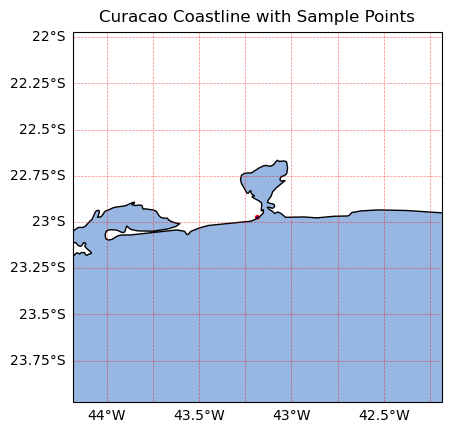

In [39]:
import matplotlib.pyplot as plt

# Plot the buffer circles
ax = plt.axes(projection=ccrs.PlateCarree())
buffer_circles.plot(ax=ax,edgecolor='red', facecolor='blue', figsize=(10, 8))

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

# circle_center.plot(ax=ax, color='blue', markersize=5)
ax.set_title('Curacao Coastline with Sample Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
buffer_center = buffer_circles["geometry"].iloc[0].centroid
plt.xlim(buffer_center.x - 1, buffer_center.x + 1)
plt.ylim(buffer_center.y - 1, buffer_center.y + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.show()

In [40]:
circle_center.head()

,fid,Number,Sandy Beach Name,Country,x,y,geometry
0,1,Sandy,Copacabana Beach,Brazil,-43.184285,-22.973883,POINT (-43.18428 -22.97388)
1,2,Sandy,Bondi Beach,Australia,151.276534,-33.892192,POINT (151.27653 -33.89219)
2,3,Sandy,Waikiki Beach,United States,-157.836584,21.280074,POINT (-157.83658 21.28007)
3,4,Sandy,Santander,Spain,-3.505031,43.474032,POINT (-3.50503 43.47403)
4,5,Sandy,Accra,Ghana,0.023618,5.644583,POINT (0.02362 5.64458)


In [41]:
buffer_circles

,geometry
0,"POLYGON ((-43.17453 -22.97377, -43.17457 -22.9..."
1,"POLYGON ((151.28734 -33.89234, 151.28727 -33.8..."
2,"POLYGON ((-157.83624 21.27699, -157.83656 21.2..."
3,"POLYGON ((-3.49267 43.47409, -3.49272 43.47320..."
4,"POLYGON ((0.03264 5.64463, 0.03260 5.64374, 0...."
...,...
145,"POLYGON ((31.51708 -29.22206, 31.51701 -29.222..."
146,"POLYGON ((0.09849 49.50206, 0.09847 49.50117, ..."
147,"POLYGON ((-3.30727 53.35644, -3.30734 53.35556..."
148,"POLYGON ((-149.97240 61.11985, -149.97250 61.1..."


In [42]:
import simplekml


# Create a KML object
kml = simplekml.Kml()

# Iterate over each buffer circle and add it to the KML object
for index, row in buffer_circles.iterrows():
    coords = list(row['geometry'].exterior.coords)
    pol = kml.newpolygon(name=str(circle_center["fid"][index])+circle_center["Sandy Beach Name"][index] +", "+ circle_center["Country"][index]+", "+ circle_center["Number"][index], outerboundaryis=coords)
    pol.style.linestyle.color = simplekml.Color.red  # Set the outline color of the circle
    pol.style.linestyle.width = 2  # Set the width of the outline

    # Set fill color with 50% opacity (Alpha value of 128)
    fill_color = simplekml.Color.changealphaint(128, simplekml.Color.white)
    pol.style.polystyle.color = fill_color

# Specify the output file path
output_kmz_file = "Beach asessment location for experts_utm.kmz"

# Save the KML object to a KMZ file
kml.savekmz(output_kmz_file)

print(f"Buffer circles exported to {output_kmz_file}")

Buffer circles exported to Beach asessment location for experts_utm.kmz


In [46]:
index

149